### 🏠주택 가격 회귀 예측

#### Features

- id: 주택의 고유 id
- date: 등록 날짜
- bedrooms: 침실 개수
- bathrooms: 욕실 개수
- sqft_living: 주거 공간(단위: 제곱 피트)
- sqft_lot: 전체 부지 크기(단위: 제곱 피트)
- floors: 층수
- waterfront: 수변 위치 여부
- view: 전망 품질 수준(0~4)
- condition: 전반적인 상태(0~5)
- grade: 전반적인 등급 평가(1~13)
- sqft_above: 지상 주거 공간의 면적(단위: 제곱 피트)
- sqft_basement: 지하 공간 면적(단위: 제곱 피트)
- yr_built: 건설연도
- yr_renovated: 리모델링 연도, 해당 없을 시 0
- zipcode: 우편번호
- lat: 위도
- long: 경도
- sqft_living15: 주변 15개 주택의 주거 공간 면적(단위: 제곱 피트)
- sqft_lot15: 주변 15개 주택의 전체 부지 면적(단위: 제곱 피트)

#### Target

- price: 주택 가격

#### 📌목차

1. 데이터 탐색 및 시각화
2. 데이터 전처리
3. OLS, VIF 확인
4. 선형 회귀 학습 및 예측, 평가
5. 다항 회귀 학습 및 예측, 평가
6. 트리 기반 모델 학습 및 예측, 평가

#### 1. 데이터 탐색 및 시각화

- 데이터를 읽어옵니다.

In [575]:
import pandas as pd

h_df = pd.read_csv('./datasets/Housing.csv', low_memory=False)
h_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


- info()를 통해 데이터를 확인해봅니다.

In [576]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

- 중복행을 확인합니다.

In [577]:
h_df.duplicated().sum()

0

- 결측치를 확인합니다.

In [578]:
h_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

- 히스토그램으로 분포를 시각화해봅니다.

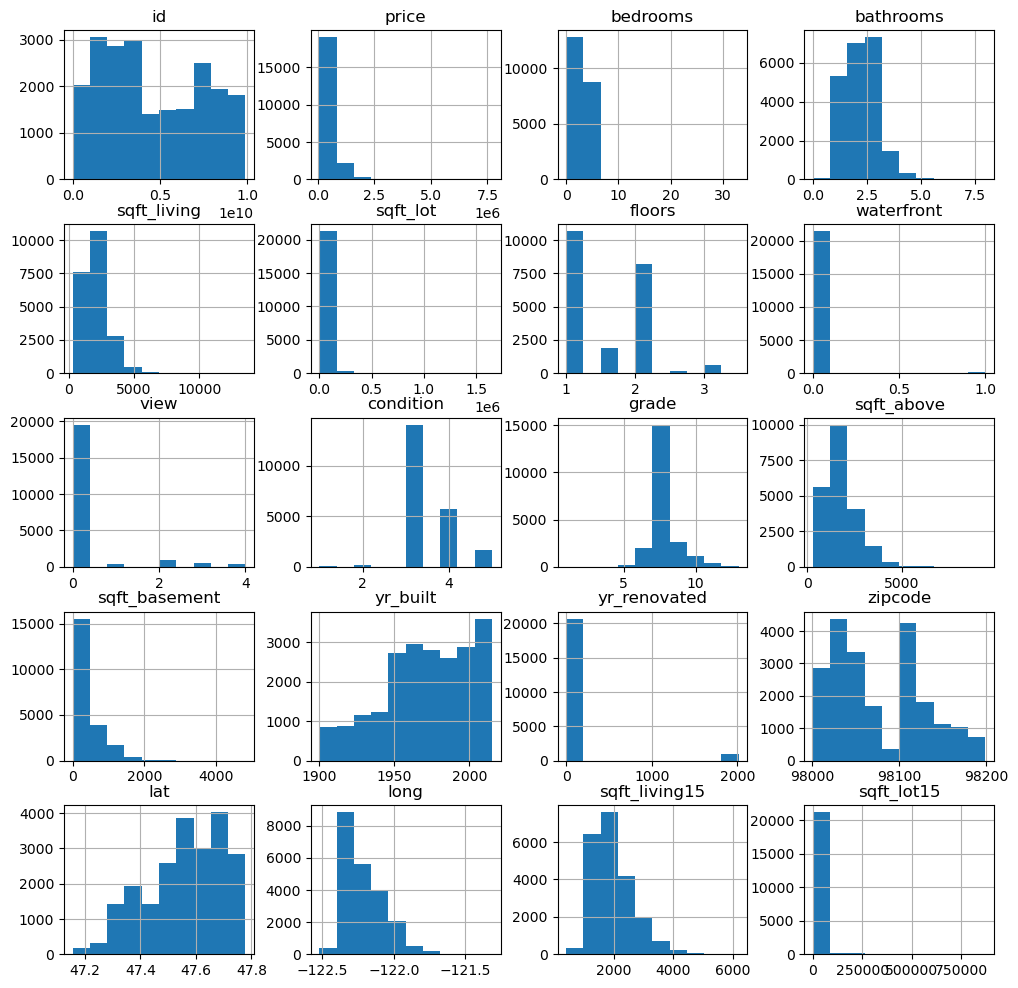

In [579]:
import matplotlib.pyplot as plt

h_df.hist(figsize=(12, 12))
plt.show()

#### 2. 데이터 전처리

- 회귀 학습에 불필요한 feature 및 범주형 feature를 제외한 feature와 target으로 데이터프레임을 추출합니다.

In [580]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
           'floors', 'sqft_above', 'sqft_basement', 'yr_built', 
           'yr_renovated', 'sqft_living15', 'sqft_lot15', 'price']
pre_h_df = h_df.loc[:, columns]
pre_h_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,2,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650,231300.0
1,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639,538000.0
2,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0,2009,0,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,2310,0,2014,0,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,1020,0,2009,0,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,1600,0,2004,0,1410,1287,400000.0


In [586]:
from statsmodels.api import OLS

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                          1.228e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:22:19   Log-Likelihood:                     -2.9952e+05
No. Observations:               21613   AIC:                                  5.991e+05
Df Residuals:                   21603   BIC:                                  5.991e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [587]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [588]:
get_vif(features)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,vif_score,feature
0,22.099624,bedrooms
1,24.416753,bathrooms
2,inf,sqft_living
3,2.362730,sqft_lot
4,15.719053,floors
5,inf,sqft_above
6,inf,sqft_basement
7,25.819579,yr_built
8,1.053291,yr_renovated
9,23.711058,sqft_living15


In [589]:
features = features.drop(labels=['sqft_living', 'sqft_above', 'sqft_basement'], axis=1)
model = OLS(targets, features)
print(model.fit().summary())
get_vif(features)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.815
Model:                            OLS   Adj. R-squared (uncentered):              0.815
Method:                 Least Squares   F-statistic:                          1.190e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:22:53   Log-Likelihood:                     -3.0182e+05
No. Observations:               21613   AIC:                                  6.036e+05
Df Residuals:                   21605   BIC:                                  6.037e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

,vif_score,feature
0,19.765842,bedrooms
1,18.423443,bathrooms
2,2.346329,sqft_lot
3,11.938442,floors
4,21.446001,yr_built
5,1.047888,yr_renovated
6,14.627229,sqft_living15
7,2.562693,sqft_lot15


In [584]:
pre_h_df.corr()['price'].sort_values(ascending=False)[1:]

sqft_living      0.702035
sqft_above       0.605567
sqft_living15    0.585378
bathrooms        0.525136
sqft_basement    0.323816
bedrooms         0.308377
floors           0.256793
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054011
Name: price, dtype: float64

- 전체 feature에 대해 이상치를 제거합니다.

In [509]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_h_df)
std_h_df = pd.DataFrame(result, columns=pre_h_df.columns)
std_h_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,-1.473841,-1.447464,-0.979835,-0.228321,-0.915427,-0.734708,-0.658681,-0.544898,-0.210128,-0.943355,-0.260715,-0.841115
1,-0.398669,0.175607,0.533634,-0.189885,0.936506,0.460841,0.245141,-0.681079,4.746678,-0.432686,-0.187868,-0.005689
2,-1.473841,-1.447464,-1.426254,-0.123298,-0.915427,-1.229834,-0.658681,-1.293892,-0.210128,1.070140,-0.172375,-0.980852
3,0.676503,1.149449,-0.130550,-0.244014,-0.915427,-0.891699,1.397515,-0.204446,-0.210128,-0.914174,-0.284522,0.174089
4,-0.398669,-0.149007,-0.435422,-0.169653,-0.915427,-0.130895,-0.658681,0.544548,-0.210128,-0.272190,-0.192849,-0.081959
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398669,0.500221,-0.598746,-0.337424,2.788439,-0.312039,-0.658681,1.293542,-0.210128,-0.666135,-0.412381,-0.490546
21609,0.676503,0.500221,0.250539,-0.224386,0.936506,0.629908,-0.658681,1.463768,-0.210128,-0.228419,-0.203946,-0.381590
21610,-1.473841,-1.772078,-1.154047,-0.332137,0.936506,-0.927928,-0.658681,1.293542,-0.210128,-1.410253,-0.394141,-0.375867
21611,-0.398669,0.500221,-0.522528,-0.307076,0.936506,-0.227505,-0.658681,1.123316,-0.210128,-0.841221,-0.420511,-0.381590


In [510]:
condition = True

for column in std_h_df.columns:
    condition &= std_h_df[column].between(-1.96, 1.96)
pre_h_df = pre_h_df.iloc[std_h_df[condition].index].reset_index(drop=True)
pre_h_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,2,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650,231300.0
1,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062,180000.0
2,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000,604000.0
3,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503,510000.0
4,3,2.25,1715,6819,2.0,1715,0,1995,0,2238,6819,257500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16035,3,2.50,1310,1294,2.0,1180,130,2008,0,1330,1265,475000.0
16036,4,2.50,2310,5813,2.0,2310,0,2014,0,1830,7200,400000.0
16037,2,0.75,1020,1350,2.0,1020,0,2009,0,1020,2007,402101.0
16038,3,2.50,1600,2388,2.0,1600,0,2004,0,1410,1287,400000.0


#### 3. OLS, VIF 확인

- OLS를 확인해봅니다.

In [511]:
from statsmodels.api import OLS

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                          1.571e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:16:51   Log-Likelihood:                     -2.1455e+05
No. Observations:               16040   AIC:                                  4.291e+05
Df Residuals:                   16031   BIC:                                  4.292e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [512]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [513]:
get_vif(features)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,vif_score,feature
0,30.297959,bedrooms
1,25.820016,bathrooms
2,inf,sqft_living
3,6.916755,sqft_lot
4,22.335540,floors
5,inf,sqft_above
6,inf,sqft_basement
7,32.597948,yr_built
8,NaN,yr_renovated
9,31.643679,sqft_living15


- 상관관계를 확인해봅니다.

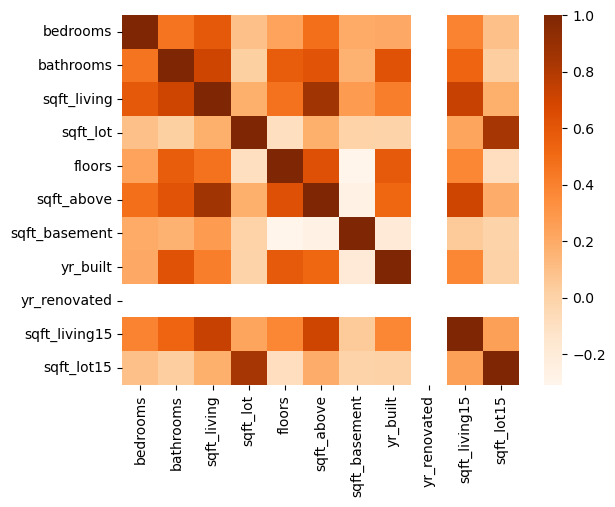

In [514]:
import seaborn as sns

sns.heatmap(features.corr(), cmap='Oranges')
plt.show()

- 종속변수와의 상관관계를 확인합니다.

In [515]:
pre_h_df.corr()['price'].sort_values(ascending=False)[1:]

sqft_living      0.565231
sqft_living15    0.513602
sqft_above       0.453875
bathrooms        0.383810
floors           0.261571
bedrooms         0.247880
sqft_basement    0.205650
sqft_lot         0.067080
sqft_lot15       0.065225
yr_built         0.050253
yr_renovated          NaN
Name: price, dtype: float64

- yr_renovated feature를 삭제합니다.

In [516]:
pre_h_df = pre_h_df.drop(labels=['yr_renovated'], axis=1)
pre_h_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price
0,2,1.00,1180,5650,1.0,1180,0,1955,1340,5650,231300.0
1,2,1.00,770,10000,1.0,770,0,1933,2720,8062,180000.0
2,4,3.00,1960,5000,1.0,1050,910,1965,1360,5000,604000.0
3,3,2.00,1680,8080,1.0,1680,0,1987,1800,7503,510000.0
4,3,2.25,1715,6819,2.0,1715,0,1995,2238,6819,257500.0
...,...,...,...,...,...,...,...,...,...,...,...
16035,3,2.50,1310,1294,2.0,1180,130,2008,1330,1265,475000.0
16036,4,2.50,2310,5813,2.0,2310,0,2014,1830,7200,400000.0
16037,2,0.75,1020,1350,2.0,1020,0,2009,1020,2007,402101.0
16038,3,2.50,1600,2388,2.0,1600,0,2004,1410,1287,400000.0


- 다시 OLS와 VIF를 확인해봅니다.

In [517]:
from statsmodels.api import OLS

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                          1.571e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:16:51   Log-Likelihood:                     -2.1455e+05
No. Observations:               16040   AIC:                                  4.291e+05
Df Residuals:                   16031   BIC:                                  4.292e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [518]:
get_vif(features)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,vif_score,feature
0,30.297959,bedrooms
1,25.820016,bathrooms
2,inf,sqft_living
3,6.916755,sqft_lot
4,22.335540,floors
5,inf,sqft_above
6,inf,sqft_basement
7,32.597948,yr_built
8,31.643679,sqft_living15
9,8.305089,sqft_lot15


- OLS에서 sqft_lot feature의 P-value가 높게 나왔으므로, 상관관계를 확인하여 제거할 feature를 결정합니다.

In [519]:
pre_h_df.corr()['price'].sort_values(ascending=False)[1:]

sqft_living      0.565231
sqft_living15    0.513602
sqft_above       0.453875
bathrooms        0.383810
floors           0.261571
bedrooms         0.247880
sqft_basement    0.205650
sqft_lot         0.067080
sqft_lot15       0.065225
yr_built         0.050253
Name: price, dtype: float64

- sqft_lot feature의 종속변수와의 상관관계가 매우 낮으므로 삭제합니다.

In [520]:
pre_h_df = pre_h_df.drop(labels=['sqft_lot'], axis=1)
pre_h_df

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price
0,2,1.00,1180,1.0,1180,0,1955,1340,5650,231300.0
1,2,1.00,770,1.0,770,0,1933,2720,8062,180000.0
2,4,3.00,1960,1.0,1050,910,1965,1360,5000,604000.0
3,3,2.00,1680,1.0,1680,0,1987,1800,7503,510000.0
4,3,2.25,1715,2.0,1715,0,1995,2238,6819,257500.0
...,...,...,...,...,...,...,...,...,...,...
16035,3,2.50,1310,2.0,1180,130,2008,1330,1265,475000.0
16036,4,2.50,2310,2.0,2310,0,2014,1830,7200,400000.0
16037,2,0.75,1020,2.0,1020,0,2009,1020,2007,402101.0
16038,3,2.50,1600,2.0,1600,0,2004,1410,1287,400000.0


In [521]:
from statsmodels.api import OLS

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                          1.767e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:16:51   Log-Likelihood:                     -2.1455e+05
No. Observations:               16040   AIC:                                  4.291e+05
Df Residuals:                   16032   BIC:                                  4.292e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [522]:
get_vif(features)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,vif_score,feature
0,30.297310,bedrooms
1,25.801919,bathrooms
2,inf,sqft_living
3,22.254106,floors
4,inf,sqft_above
5,inf,sqft_basement
6,32.583189,yr_built
7,31.641685,sqft_living15
8,2.813316,sqft_lot15


#### 4. 선형 회귀 학습 및 예측, 평가

- 다중 공선성이 높게 나타나지만, 우선 선형 회귀 예측을 수행해보기로 합니다.

In [523]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [524]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [525]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 20589773345.5442, RMSE: 143491.3703, R2: 0.4425


#### 5. 다항 회귀 학습, 예측 및 평가
- R2 점수가 0.4425로 낮은 수치를 보이므로, 다항(Polynomial) 회귀 예측을 진행해봅니다.

In [526]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [527]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 17695659903.8636, RMSE: 133025.0349, R2: 0.5209


- degree=4일 때 R2가 가장 높았지만, 여전히 낮은 수치를 보이므로 전처리를 다시 수행합니다.

#### 📌Cycle 2

- 종속 변수의 분포를 히스토그램으로 확인합니다.

<Axes: >

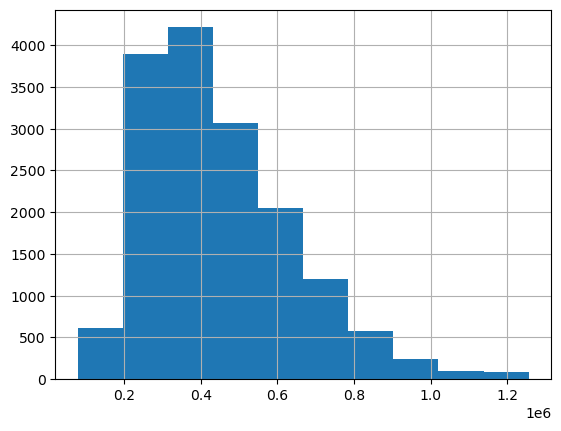

In [528]:
pre_h_df.price.hist()

- log1p 스케일링을 적용해봅니다.

<Axes: >

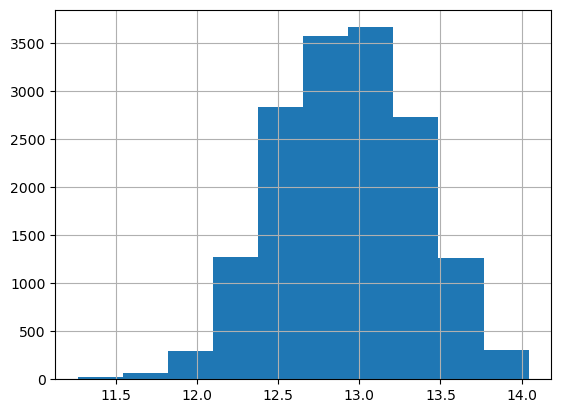

In [529]:
import numpy as np

np.log1p(pre_h_df.price).hist()

- 정규분포에 가까운 분포 양상을 띠게 되었음을 확인할 수 있습니다.
- 이에 따라 다시 OLS 및 VIF를 확인해봅니다.

In [530]:
from statsmodels.api import OLS

pre_h_df2 = pre_h_df.copy()
pre_h_df2.price = np.log1p(pre_h_df2.price)
features, targets = pre_h_df2.iloc[:, :-1], pre_h_df2.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.182e+06
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:16:52   Log-Likelihood:                         -7721.7
No. Observations:               16040   AIC:                                  1.546e+04
Df Residuals:                   16032   BIC:                                  1.552e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [531]:
get_vif(features)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,vif_score,feature
0,30.297310,bedrooms
1,25.801919,bathrooms
2,inf,sqft_living
3,22.254106,floors
4,inf,sqft_above
5,inf,sqft_basement
6,32.583189,yr_built
7,31.641685,sqft_living15
8,2.813316,sqft_lot15


- floors feature의 P-value가 높게 나왔으므로, 상관관계를 확인하여 제거 대상 feature를 결정합니다.

In [532]:
pre_h_df2.corr()['price'].sort_values(ascending=False)[1:]

sqft_living      0.569390
sqft_living15    0.519272
sqft_above       0.452887
bathrooms        0.411335
floors           0.277434
bedrooms         0.256603
sqft_basement    0.215169
yr_built         0.080927
sqft_lot15       0.061813
Name: price, dtype: float64

In [533]:
pre_h_df2.corr()

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price
bedrooms,1.000000,0.462266,0.587239,0.234554,0.479917,0.198169,0.205257,0.390410,0.098069,0.256603
bathrooms,0.462266,1.000000,0.704135,0.568410,0.615876,0.162817,0.624090,0.530513,0.023884,0.411335
sqft_living,0.587239,0.704135,1.000000,0.466963,0.853897,0.269640,0.415780,0.730369,0.181301,0.569390
floors,0.234554,0.568410,0.466963,1.000000,0.633482,-0.308428,0.581092,0.373160,-0.085710,0.277434
sqft_above,0.479917,0.615876,0.853897,0.633482,1.000000,-0.270921,0.516194,0.706125,0.187622,0.452887
sqft_basement,0.198169,0.162817,0.269640,-0.308428,-0.270921,1.000000,-0.186082,0.044353,-0.011821,0.215169
yr_built,0.205257,0.624090,0.415780,0.581092,0.516194,-0.186082,1.000000,0.379925,0.006557,0.080927
sqft_living15,0.390410,0.530513,0.730369,0.373160,0.706125,0.044353,0.379925,1.000000,0.252850,0.519272
sqft_lot15,0.098069,0.023884,0.181301,-0.085710,0.187622,-0.011821,0.006557,0.252850,1.000000,0.061813
price,0.256603,0.411335,0.569390,0.277434,0.452887,0.215169,0.080927,0.519272,0.061813,1.000000


- VIF에서도 inf값을 보인 sqft_above feature는 floors feature와의 상관관계가 높게 나타나므로 삭제합니다.

In [534]:
pre_h_df2 = pre_h_df2.drop(labels=['sqft_above'], axis=1)
pre_h_df2

,bedrooms,bathrooms,sqft_living,floors,sqft_basement,yr_built,sqft_living15,sqft_lot15,price
0,2,1.00,1180,1.0,0,1955,1340,5650,12.351475
1,2,1.00,770,1.0,0,1933,2720,8062,12.100718
2,4,3.00,1960,1.0,910,1965,1360,5000,13.311331
3,3,2.00,1680,1.0,0,1987,1800,7503,13.142168
4,3,2.25,1715,2.0,0,1995,2238,6819,12.458779
...,...,...,...,...,...,...,...,...,...
16035,3,2.50,1310,2.0,130,2008,1330,1265,13.071072
16036,4,2.50,2310,2.0,0,2014,1830,7200,12.899222
16037,2,0.75,1020,2.0,0,2009,1020,2007,12.904461
16038,3,2.50,1600,2.0,0,2004,1410,1287,12.899222


In [535]:
from statsmodels.api import OLS

features, targets = pre_h_df2.iloc[:, :-1], pre_h_df2.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.182e+06
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:16:52   Log-Likelihood:                         -7721.7
No. Observations:               16040   AIC:                                  1.546e+04
Df Residuals:                   16032   BIC:                                  1.552e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

- 또한 종속변수와의 상관관계가 낮은 yr_built와 sqft_lot15 feature를 삭제합니다.

In [536]:
pre_h_df2 = pre_h_df2.drop(labels=['yr_built', 'sqft_lot15'], axis=1)
pre_h_df2

,bedrooms,bathrooms,sqft_living,floors,sqft_basement,sqft_living15,price
0,2,1.00,1180,1.0,0,1340,12.351475
1,2,1.00,770,1.0,0,2720,12.100718
2,4,3.00,1960,1.0,910,1360,13.311331
3,3,2.00,1680,1.0,0,1800,13.142168
4,3,2.25,1715,2.0,0,2238,12.458779
...,...,...,...,...,...,...,...
16035,3,2.50,1310,2.0,130,1330,13.071072
16036,4,2.50,2310,2.0,0,1830,12.899222
16037,2,0.75,1020,2.0,0,1020,12.904461
16038,3,2.50,1600,2.0,0,1410,12.899222


In [537]:
from statsmodels.api import OLS

features, targets = pre_h_df2.iloc[:, :-1], pre_h_df2.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          8.660e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:16:52   Log-Likelihood:                         -35672.
No. Observations:               16040   AIC:                                  7.136e+04
Df Residuals:                   16034   BIC:                                  7.140e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [538]:
get_vif(features)

,vif_score,feature
0,19.042940,bedrooms
1,25.675451,bathrooms
2,36.092076,sqft_living
3,18.120211,floors
4,2.197159,sqft_basement
5,25.107820,sqft_living15


In [539]:
pre_h_df2.corr()['price'].sort_values(ascending=False)[1:]

sqft_living      0.569390
sqft_living15    0.519272
bathrooms        0.411335
floors           0.277434
bedrooms         0.256603
sqft_basement    0.215169
Name: price, dtype: float64

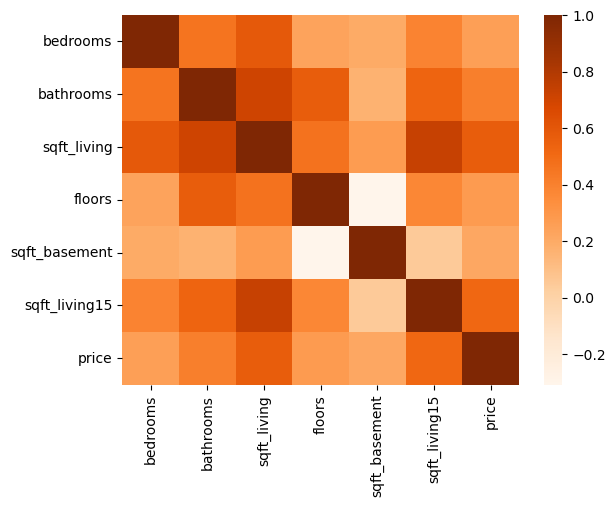

In [540]:
sns.heatmap(pre_h_df2.corr(), cmap='Oranges')
plt.show()

- 다시 선형 회귀 예측을 수행해봅니다.

In [541]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_h_df2.iloc[:, :-1], pre_h_df2.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [542]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.1148, RMSE: 0.3388, R2: 0.3824


- R2 점수가 오히려 감소한 모습을 볼 수 있습니다.
- R2 점수가 약 0.3대로, 비선형 데이터로 간주하고 트리 기반의 회귀 모델로 학습 및 예측을 수행해봅니다.

In [543]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.2087, RMSE: 0.4568, R2: -0.1227
RandomForestRegressor
MSE: 0.1151, RMSE: 0.3393, R2: 0.3807
GradientBoostingRegressor
MSE: 0.1056, RMSE: 0.3250, R2: 0.4319
XGBRegressor
MSE: 0.1116, RMSE: 0.3341, R2: 0.3995
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 631
[LightGBM] [Info] Number of data points in the train set: 12832, number of used features: 6
[LightGBM] [Info] Start training from score 12.921160
LGBMRegressor
MSE: 0.1051, RMSE: 0.3242, R2: 0.4346


- R2 점수가 가장 높은 LightGBM 모델의 R2 점수도 Cycle 1의 R2 결과보다 낮게 나왔으므로, Cycle 1로 복구 후 다른 방식으로 전처리를 수행합니다.

### 📌Cycle 3
- 독립변수와 종속변수의 분포 비중을 맞추는 데 중점을 둡니다.

In [544]:
import numpy as np

pre_h_df2 = pre_h_df.copy()
pre_h_df2.price = np.log1p(pre_h_df2.price)
pre_h_df2

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price
0,2,1.00,1180,1.0,1180,0,1955,1340,5650,12.351475
1,2,1.00,770,1.0,770,0,1933,2720,8062,12.100718
2,4,3.00,1960,1.0,1050,910,1965,1360,5000,13.311331
3,3,2.00,1680,1.0,1680,0,1987,1800,7503,13.142168
4,3,2.25,1715,2.0,1715,0,1995,2238,6819,12.458779
...,...,...,...,...,...,...,...,...,...,...
16035,3,2.50,1310,2.0,1180,130,2008,1330,1265,13.071072
16036,4,2.50,2310,2.0,2310,0,2014,1830,7200,12.899222
16037,2,0.75,1020,2.0,1020,0,2009,1020,2007,12.904461
16038,3,2.50,1600,2.0,1600,0,2004,1410,1287,12.899222


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

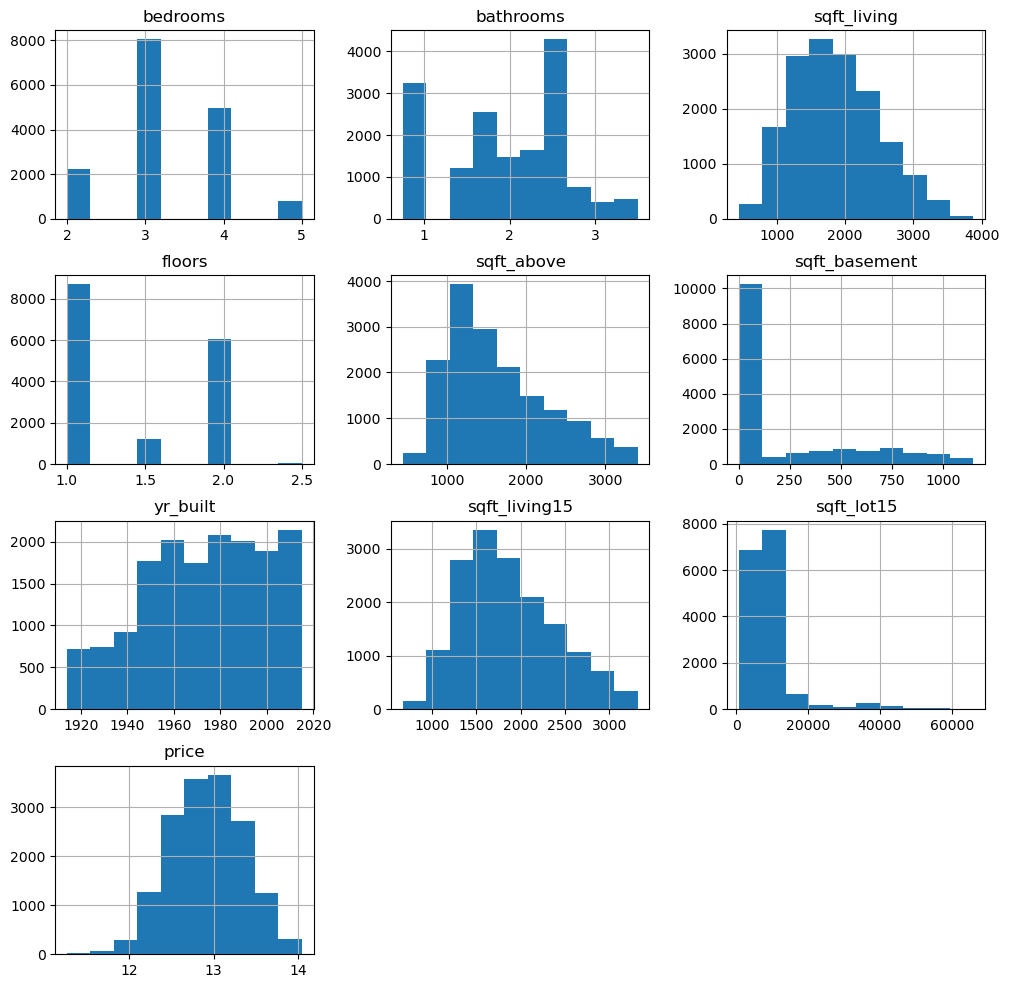

In [545]:
pre_h_df2.hist(figsize=(12, 12))

In [546]:
pre_h_df2.corr()['price'].sort_values(ascending=False)[1:]

sqft_living      0.569390
sqft_living15    0.519272
sqft_above       0.452887
bathrooms        0.411335
floors           0.277434
bedrooms         0.256603
sqft_basement    0.215169
yr_built         0.080927
sqft_lot15       0.061813
Name: price, dtype: float64

- 종속변수와의 상관관계가 높은 순으로 3번째인 sqft_above feature에 log1p scale을 적용하여 분포를 좀 더 고르게 맞춰줍니다.

<Axes: >

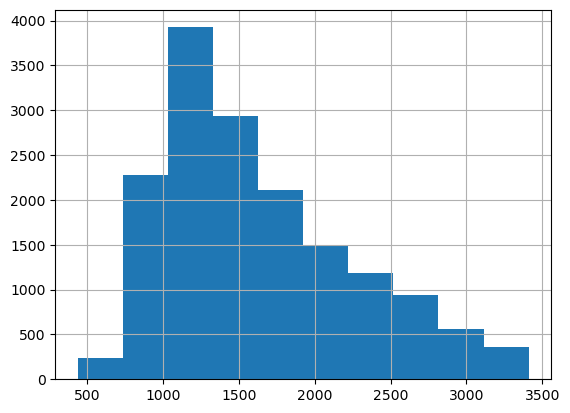

In [547]:
pre_h_df2['sqft_above'].hist()

<Axes: >

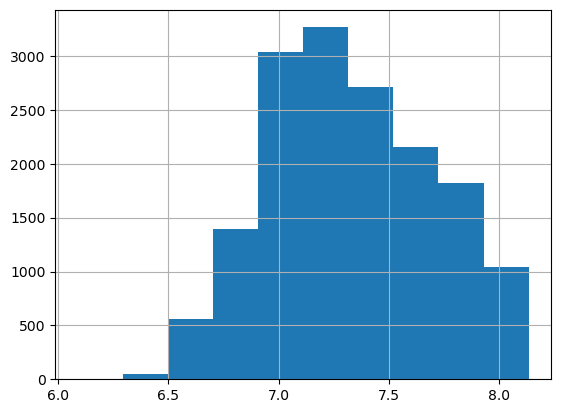

In [548]:
import numpy as np

np.log1p(pre_h_df2['sqft_above']).hist()

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

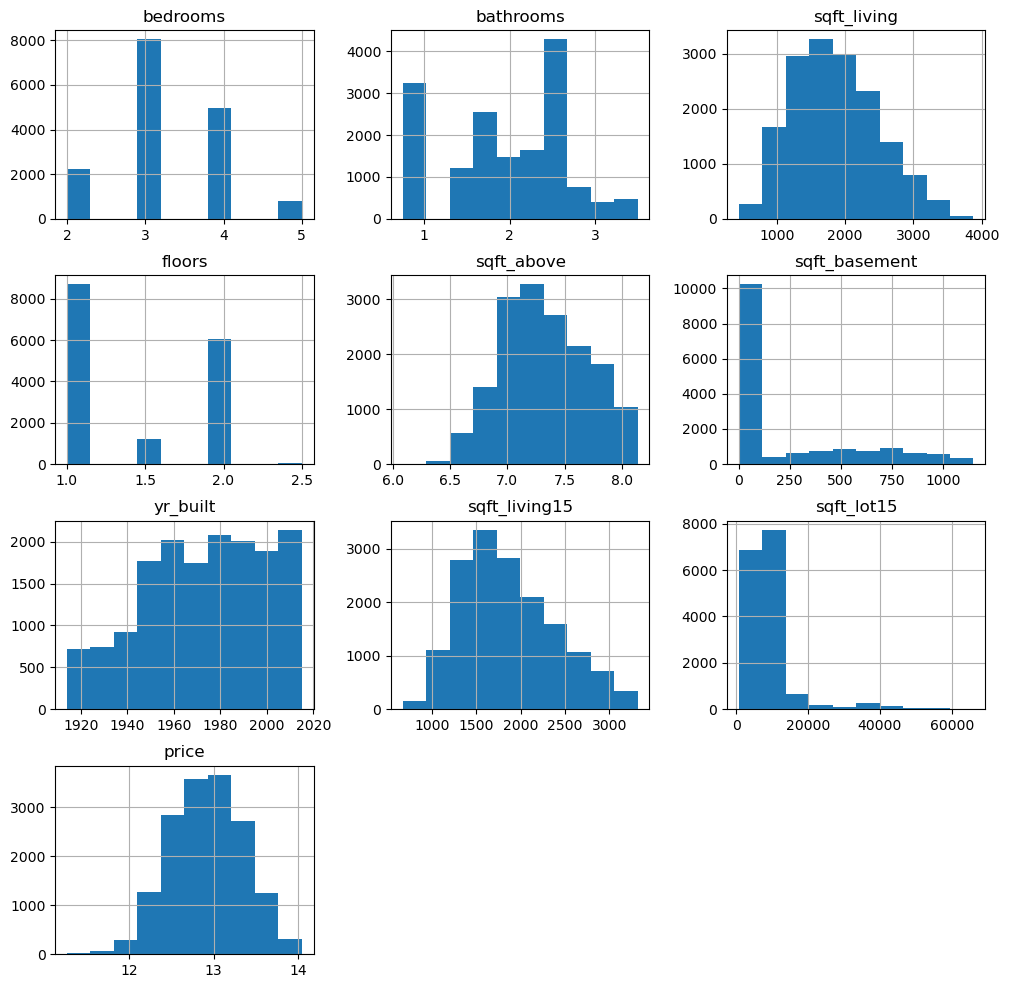

In [549]:
pre_h_df2['sqft_above'] = np.log1p(pre_h_df2['sqft_above'])
pre_h_df2.hist(figsize=(12, 12))

<Axes: >

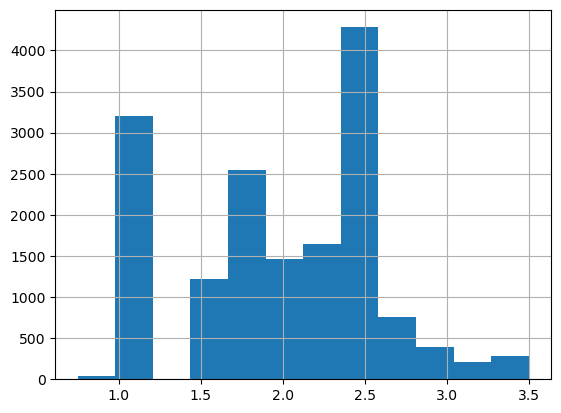

In [550]:
pre_h_df2['bathrooms'].hist(bins=12)

In [551]:
pre_h_df2['bathrooms'].value_counts()

bathrooms
2.50    4282
1.00    3198
1.75    2546
2.25    1648
2.00    1466
1.50    1216
2.75     762
3.00     396
3.50     279
3.25     206
0.75      36
1.25       5
Name: count, dtype: int64

- 분포 비중을 맞추기 위해 bathrooms 의 값이 1.5 미만인 행을 이상치로 간주하고 삭제하기로 합니다.

<Axes: >

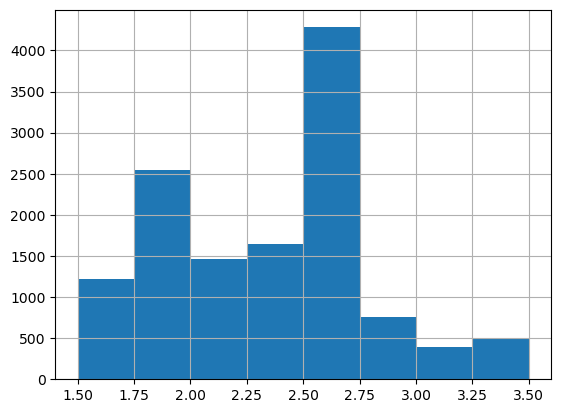

In [552]:
pre_h_df2 = pre_h_df2[pre_h_df2['bathrooms'] >= 1.5]
pre_h_df2.reset_index(drop=True, inplace=True)
pre_h_df2['bathrooms'].hist(bins=8)

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

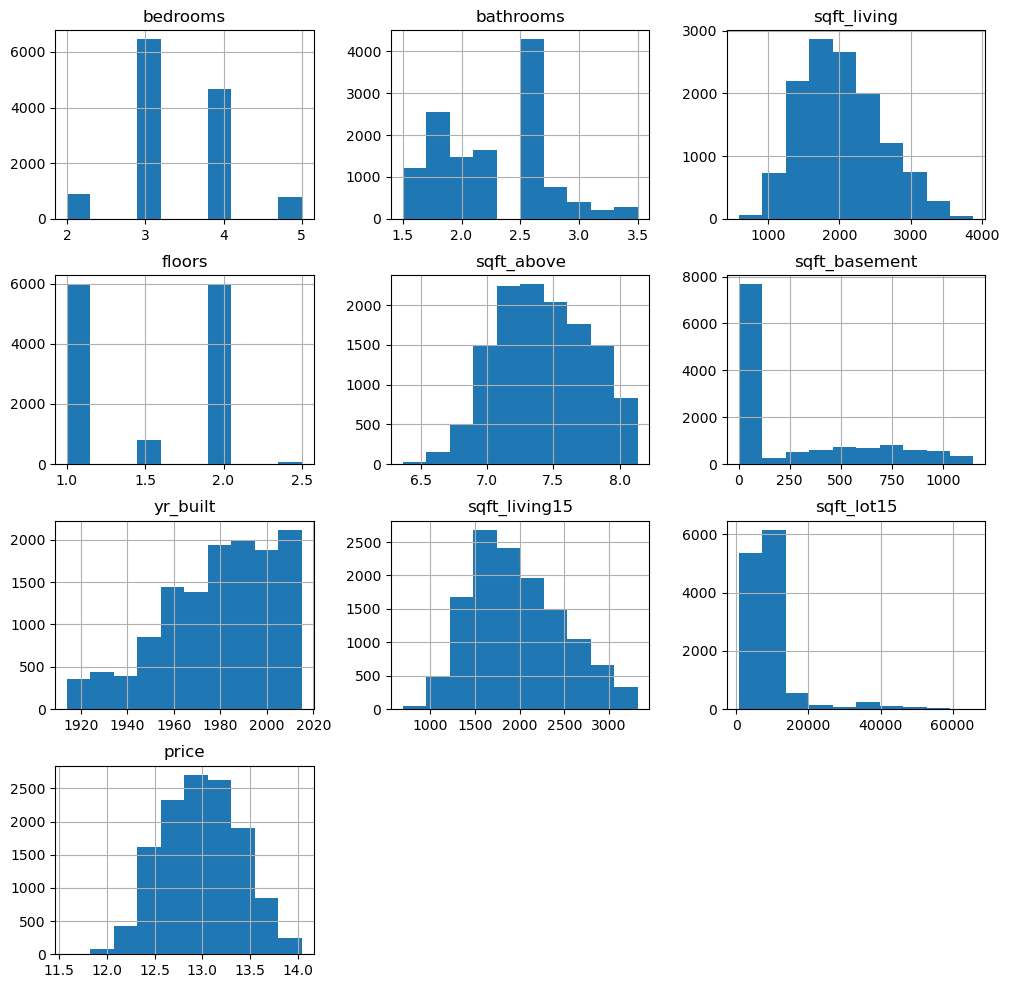

In [553]:
pre_h_df2.hist(figsize=(12, 12))

In [554]:
pre_h_df2.corr()['price'].sort_values(ascending=False)[1:]

sqft_living      0.531400
sqft_living15    0.464499
sqft_above       0.374997
bathrooms        0.295901
floors           0.192156
bedrooms         0.178146
sqft_basement    0.162295
sqft_lot15       0.080940
yr_built        -0.053825
Name: price, dtype: float64

- floors feature에서 1.5 및 2.5 값을 갖는 행의 개수가 너무 적으므로, 분포를 맞추기 위해 삭제하기로 합니다.

In [555]:
pre_h_df2['floors'].value_counts()

floors
1.0    5978
2.0    5966
1.5     793
2.5      64
Name: count, dtype: int64

In [556]:
pre_h_df2 = pre_h_df2[pre_h_df2['floors'].isin([1.0, 2.0])]
pre_h_df2

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price
0,4,3.00,1960,1.0,6.957497,910,1965,1360,5000,13.311331
1,3,2.00,1680,1.0,7.427144,0,1987,1800,7503,13.142168
2,3,2.25,1715,2.0,7.447751,0,1995,2238,6819,12.458779
3,3,1.50,1060,1.0,6.966967,0,1963,1650,9711,12.583999
4,3,2.50,1890,2.0,7.544861,0,2003,2390,7570,12.685411
...,...,...,...,...,...,...,...,...,...,...
12796,4,2.50,2520,2.0,7.832411,0,2014,2520,6023,13.322338
12797,4,3.50,3510,2.0,7.863651,910,2009,2050,6200,13.822984
12798,3,2.50,1310,2.0,7.074117,130,2008,1330,1265,13.071072
12799,4,2.50,2310,2.0,7.745436,0,2014,1830,7200,12.899222


- bedrooms feature에 대해서도 같은 과정을 수행합니다.

In [557]:
pre_h_df2['bedrooms'].value_counts()

bedrooms
3    6094
4    4335
2     834
5     681
Name: count, dtype: int64

In [558]:
pre_h_df2 = pre_h_df2[pre_h_df2['bedrooms'].isin([3, 4])]
pre_h_df2

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price
0,4,3.00,1960,1.0,6.957497,910,1965,1360,5000,13.311331
1,3,2.00,1680,1.0,7.427144,0,1987,1800,7503,13.142168
2,3,2.25,1715,2.0,7.447751,0,1995,2238,6819,12.458779
3,3,1.50,1060,1.0,6.966967,0,1963,1650,9711,12.583999
4,3,2.50,1890,2.0,7.544861,0,2003,2390,7570,12.685411
...,...,...,...,...,...,...,...,...,...,...
12796,4,2.50,2520,2.0,7.832411,0,2014,2520,6023,13.322338
12797,4,3.50,3510,2.0,7.863651,910,2009,2050,6200,13.822984
12798,3,2.50,1310,2.0,7.074117,130,2008,1330,1265,13.071072
12799,4,2.50,2310,2.0,7.745436,0,2014,1830,7200,12.899222


In [559]:
pre_h_df2['bedrooms'].value_counts()

bedrooms
3    6094
4    4335
Name: count, dtype: int64

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

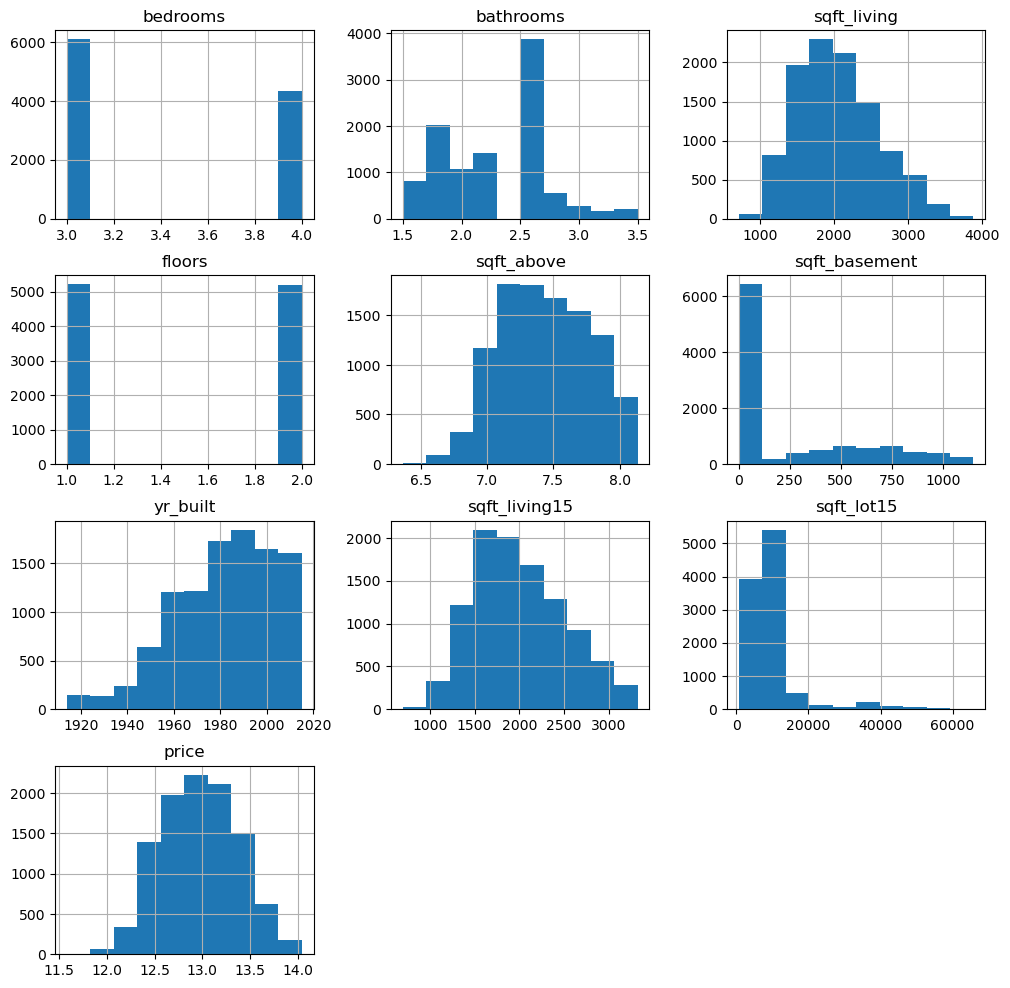

In [560]:
pre_h_df2.hist(figsize=(12, 12))

- yr_built feature를 삭제합니다.

In [561]:
pre_h_df2 = pre_h_df2.drop(labels=['yr_built'], axis=1)
pre_h_df2

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,4,3.00,1960,1.0,6.957497,910,1360,5000,13.311331
1,3,2.00,1680,1.0,7.427144,0,1800,7503,13.142168
2,3,2.25,1715,2.0,7.447751,0,2238,6819,12.458779
3,3,1.50,1060,1.0,6.966967,0,1650,9711,12.583999
4,3,2.50,1890,2.0,7.544861,0,2390,7570,12.685411
...,...,...,...,...,...,...,...,...,...
12796,4,2.50,2520,2.0,7.832411,0,2520,6023,13.322338
12797,4,3.50,3510,2.0,7.863651,910,2050,6200,13.822984
12798,3,2.50,1310,2.0,7.074117,130,1330,1265,13.071072
12799,4,2.50,2310,2.0,7.745436,0,1830,7200,12.899222


In [562]:
from statsmodels.api import OLS

features, targets = pre_h_df2.iloc[:, :-1], pre_h_df2.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.855e+06
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:17:29   Log-Likelihood:                         -3667.5
No. Observations:               10429   AIC:                                      7351.
Df Residuals:                   10421   BIC:                                      7409.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [563]:
get_vif(features)

,vif_score,feature
0,61.503179,bedrooms
1,49.971788,bathrooms
2,43.329072,sqft_living
3,24.037434,floors
4,91.221722,sqft_above
5,2.428223,sqft_basement
6,36.527071,sqft_living15
7,2.800029,sqft_lot15


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

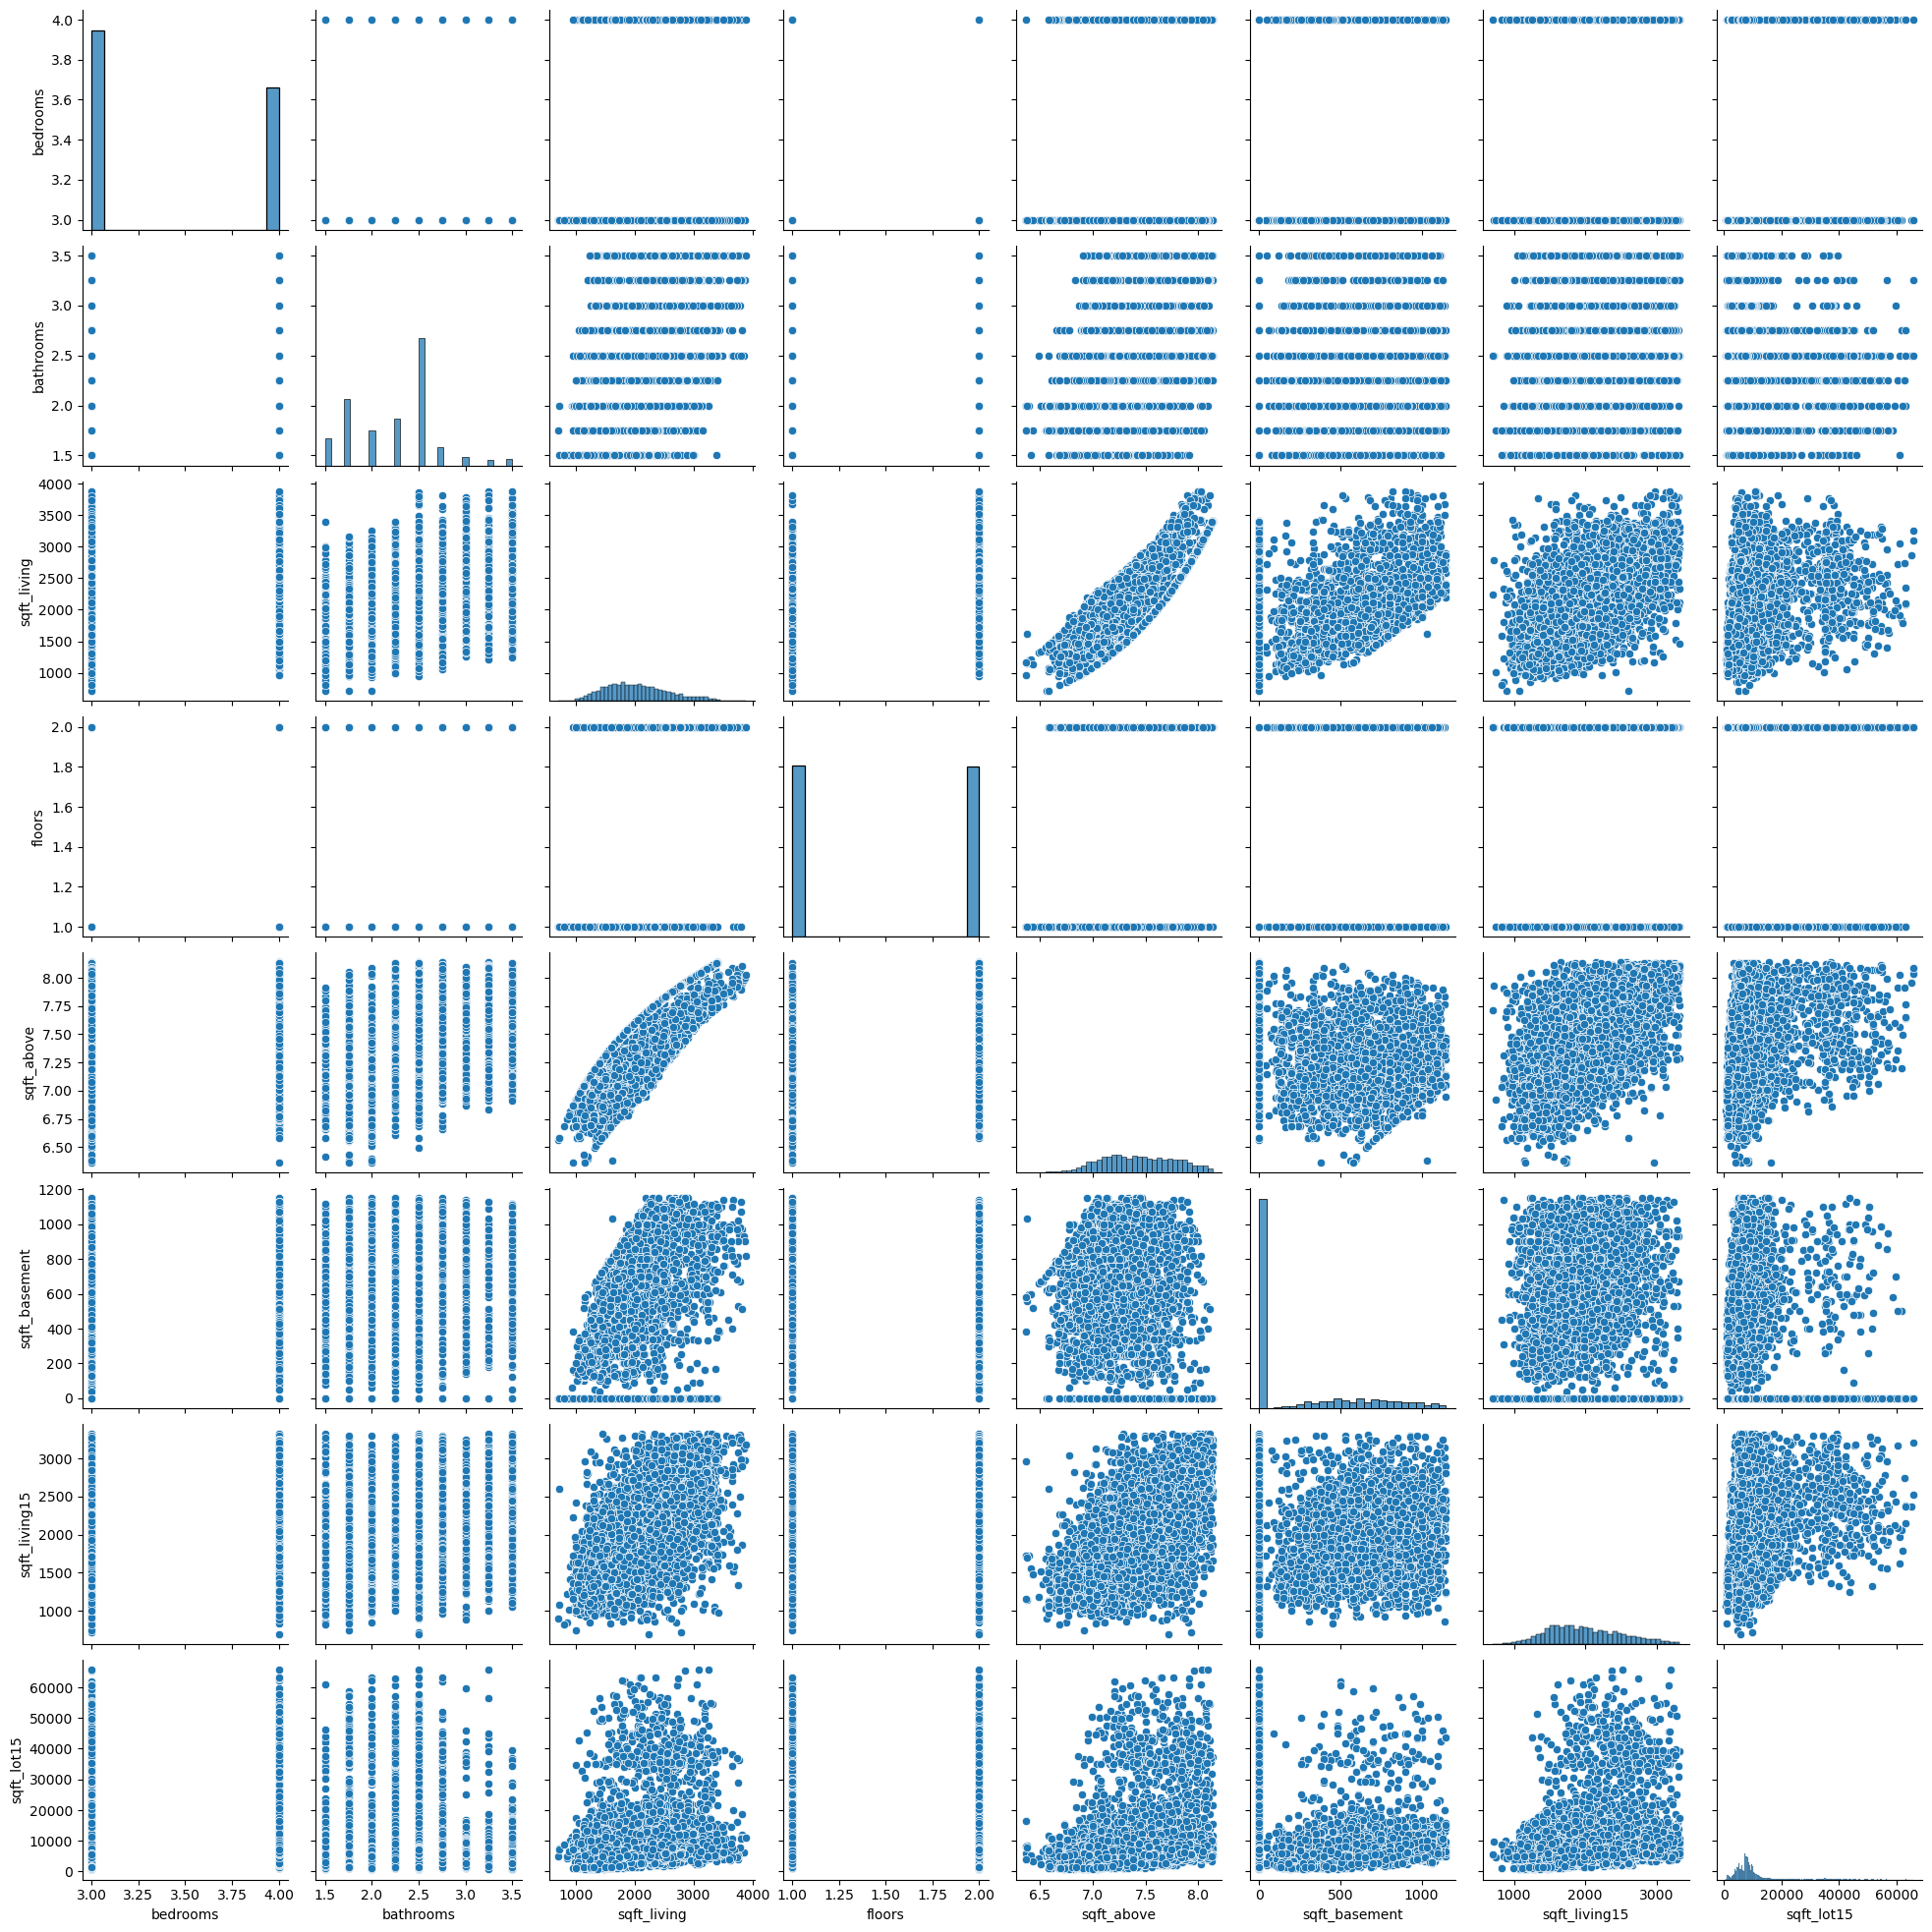

In [564]:
sns.pairplot(features)

- 현재 상태로 선형 회귀 예측을 먼저 수행해봅니다.

In [565]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [566]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.1005, RMSE: 0.3170, R2: 0.3651


#### 📌Cycle 4
- R2 가 Cycle 1, 2의 선형 회귀 예측 결과보다 더 낮아졌으므로, 추가적인 전처리를 수행합니다.

In [567]:
pre_h_df2

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,4,3.00,1960,1.0,6.957497,910,1360,5000,13.311331
1,3,2.00,1680,1.0,7.427144,0,1800,7503,13.142168
2,3,2.25,1715,2.0,7.447751,0,2238,6819,12.458779
3,3,1.50,1060,1.0,6.966967,0,1650,9711,12.583999
4,3,2.50,1890,2.0,7.544861,0,2390,7570,12.685411
...,...,...,...,...,...,...,...,...,...
12796,4,2.50,2520,2.0,7.832411,0,2520,6023,13.322338
12797,4,3.50,3510,2.0,7.863651,910,2050,6200,13.822984
12798,3,2.50,1310,2.0,7.074117,130,1330,1265,13.071072
12799,4,2.50,2310,2.0,7.745436,0,1830,7200,12.899222


In [568]:
pre_h_df2.corr()['price'].sort_values(ascending=False)[1:]

sqft_living      0.553812
sqft_living15    0.483484
sqft_above       0.390343
bathrooms        0.306015
floors           0.215822
bedrooms         0.194863
sqft_basement    0.141598
sqft_lot15       0.099136
Name: price, dtype: float64

- pairplot으로 확인하였을 때, sqft_living과 sqft_above 독립변수 간의 상관관계가 높았으므로, 종속변수와의 상관관계가 더 낮은 sqft_above를 삭제합니다.

In [569]:
pre_h_df2 = pre_h_df2.drop(labels=['sqft_above'], axis=1)
pre_h_df2

,bedrooms,bathrooms,sqft_living,floors,sqft_basement,sqft_living15,sqft_lot15,price
0,4,3.00,1960,1.0,910,1360,5000,13.311331
1,3,2.00,1680,1.0,0,1800,7503,13.142168
2,3,2.25,1715,2.0,0,2238,6819,12.458779
3,3,1.50,1060,1.0,0,1650,9711,12.583999
4,3,2.50,1890,2.0,0,2390,7570,12.685411
...,...,...,...,...,...,...,...,...
12796,4,2.50,2520,2.0,0,2520,6023,13.322338
12797,4,3.50,3510,2.0,910,2050,6200,13.822984
12798,3,2.50,1310,2.0,130,1330,1265,13.071072
12799,4,2.50,2310,2.0,0,1830,7200,12.899222


- 종속변수와의 상관관계가 낮은 sqft_lot15 를 삭제합니다.

In [570]:
pre_h_df2 = pre_h_df2.drop(labels=['sqft_lot15'], axis=1)

In [571]:
from statsmodels.api import OLS

features, targets = pre_h_df2.iloc[:, :-1], pre_h_df2.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.267e+05
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:17:47   Log-Likelihood:                         -19097.
No. Observations:               10429   AIC:                                  3.821e+04
Df Residuals:                   10423   BIC:                                  3.825e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [572]:
get_vif(features)

,vif_score,feature
0,30.387347,bedrooms
1,44.129008,bathrooms
2,42.519423,sqft_living
3,22.913641,floors
4,2.402394,sqft_basement
5,32.769782,sqft_living15


In [573]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [574]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.1004, RMSE: 0.3169, R2: 0.3653


#### 📌Cycle 5
- sqft_basement feature에 0 값이 너무 많으므로, 해당 feature를 삭제합니다.
  

In [500]:
pre_h_df2 = pre_h_df2.drop(labels=['sqft_basement'], axis=1)
pre_h_df2

,bedrooms,bathrooms,sqft_living,floors,sqft_living15,sqft_lot15,price
0,4,3.00,1960,1.0,1360,5000,13.311331
1,3,2.00,1680,1.0,1800,7503,13.142168
2,3,2.25,1715,2.0,2238,6819,12.458779
3,3,1.50,1060,1.0,1650,9711,12.583999
4,3,2.50,1890,2.0,2390,7570,12.685411
...,...,...,...,...,...,...,...
12796,4,2.50,2520,2.0,2520,6023,13.322338
12797,4,3.50,3510,2.0,2050,6200,13.822984
12798,3,2.50,1310,2.0,1330,1265,13.071072
12799,4,2.50,2310,2.0,1830,7200,12.899222


In [501]:
from statsmodels.api import OLS

features, targets = pre_h_df2.iloc[:, :-1], pre_h_df2.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.242e+05
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:14:55   Log-Likelihood:                         -19199.
No. Observations:               10429   AIC:                                  3.841e+04
Df Residuals:                   10423   BIC:                                  3.845e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [502]:
get_vif(features)

,vif_score,feature
0,29.846416,bedrooms
1,41.132012,bathrooms
2,37.800131,sqft_living
3,15.783226,floors
4,32.865495,sqft_living15
5,2.705615,sqft_lot15


- sqft_living, sqft_above feature에 OLS를 통해 구한 coef를 곱하여 새로운 feature로 합쳐줍니다.
- 이때, coef가 음수일 경우 -1을 곱하여 양수로 만들어준 후 곱하며, 양수이지만 1보다 작을 경우 1을 더한 후 곱해줍니다.

In [364]:
sqft_df = pre_h_df2[['sqft_living', 'sqft_above', 'price']]
sqft_df

,sqft_living,sqft_above,price
0,1960,6.957497,13.311331
1,1680,7.427144,13.142168
2,1715,7.447751,12.458779
3,1060,6.966967,12.583999
4,1890,7.544861,12.685411
...,...,...,...
12796,2520,7.832411,13.322338
12797,3510,7.863651,13.822984
12798,1310,7.074117,13.071072
12799,2310,7.745436,12.899222


In [365]:
from statsmodels.api import OLS

features, targets = sqft_df.iloc[:, :-1], sqft_df.iloc[:, -1]

model = OLS(targets, features)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          3.074e+06
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:24:41   Log-Likelihood:                         -8260.5
No. Observations:               10429   AIC:                                  1.653e+04
Df Residuals:                   10427   BIC:                                  1.654e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [366]:
columns = ['sqft_living', 'sqft_above']

for column in columns:
    coef = result.params[column]
    if coef < 0:
        coef *= -1
    elif coef < 1:
        coef += 1
    pre_h_df2[column] = pre_h_df2[column] * coef

pre_h_df2

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_living15,sqft_lot15,price
0,4,3.00,0.817738,1.0,12.926349,1360,5000,13.311331
1,3,2.00,0.700918,1.0,13.798906,1800,7503,13.142168
2,3,2.25,0.715521,2.0,13.837192,2238,6819,12.458779
3,3,1.50,0.442246,1.0,12.943942,1650,9711,12.583999
4,3,2.50,0.788533,2.0,14.017613,2390,7570,12.685411
...,...,...,...,...,...,...,...,...
12796,4,2.50,1.051378,2.0,14.551852,2520,6023,13.322338
12797,4,3.50,1.464419,2.0,14.609894,2050,6200,13.822984
12798,3,2.50,0.546549,2.0,13.143016,1330,1265,13.071072
12799,4,2.50,0.963763,2.0,14.390261,1830,7200,12.899222


In [367]:
pre_h_df2['sqft'] = pre_h_df2['sqft_living'] + pre_h_df2['sqft_above']
pre_h_df2

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_living15,sqft_lot15,price,sqft
0,4,3.00,0.817738,1.0,12.926349,1360,5000,13.311331,13.744087
1,3,2.00,0.700918,1.0,13.798906,1800,7503,13.142168,14.499825
2,3,2.25,0.715521,2.0,13.837192,2238,6819,12.458779,14.552713
3,3,1.50,0.442246,1.0,12.943942,1650,9711,12.583999,13.386189
4,3,2.50,0.788533,2.0,14.017613,2390,7570,12.685411,14.806146
...,...,...,...,...,...,...,...,...,...
12796,4,2.50,1.051378,2.0,14.551852,2520,6023,13.322338,15.603230
12797,4,3.50,1.464419,2.0,14.609894,2050,6200,13.822984,16.074313
12798,3,2.50,0.546549,2.0,13.143016,1330,1265,13.071072,13.689566
12799,4,2.50,0.963763,2.0,14.390261,1830,7200,12.899222,15.354023


In [368]:
columns = ['sqft_living', 'sqft_above']
pre_h_df2 = pre_h_df2.drop(labels=columns, axis=1)
pre_h_df2

,bedrooms,bathrooms,floors,sqft_living15,sqft_lot15,price,sqft
0,4,3.00,1.0,1360,5000,13.311331,13.744087
1,3,2.00,1.0,1800,7503,13.142168,14.499825
2,3,2.25,2.0,2238,6819,12.458779,14.552713
3,3,1.50,1.0,1650,9711,12.583999,13.386189
4,3,2.50,2.0,2390,7570,12.685411,14.806146
...,...,...,...,...,...,...,...
12796,4,2.50,2.0,2520,6023,13.322338,15.603230
12797,4,3.50,2.0,2050,6200,13.822984,16.074313
12798,3,2.50,2.0,1330,1265,13.071072,13.689566
12799,4,2.50,2.0,1830,7200,12.899222,15.354023


In [369]:
prices = pre_h_df2.price
pre_h_df2 = pre_h_df2.drop(labels=['price'], axis=1)
pre_h_df2['price'] = prices
pre_h_df2

,bedrooms,bathrooms,floors,sqft_living15,sqft_lot15,sqft,price
0,4,3.00,1.0,1360,5000,13.744087,13.311331
1,3,2.00,1.0,1800,7503,14.499825,13.142168
2,3,2.25,2.0,2238,6819,14.552713,12.458779
3,3,1.50,1.0,1650,9711,13.386189,12.583999
4,3,2.50,2.0,2390,7570,14.806146,12.685411
...,...,...,...,...,...,...,...
12796,4,2.50,2.0,2520,6023,15.603230,13.322338
12797,4,3.50,2.0,2050,6200,16.074313,13.822984
12798,3,2.50,2.0,1330,1265,13.689566,13.071072
12799,4,2.50,2.0,1830,7200,15.354023,12.899222


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'floors'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'sqft'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

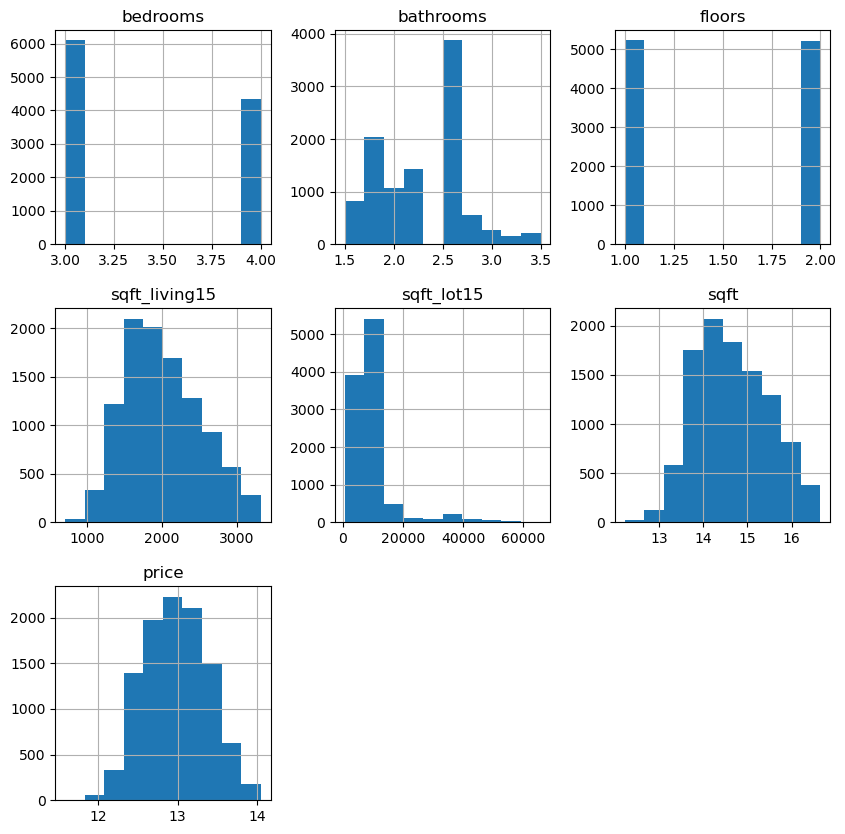

In [370]:
pre_h_df2.hist(figsize=(10, 10))

- sqft_lot15 feature에 log1p 스케일링을 적용합니다.

<Axes: >

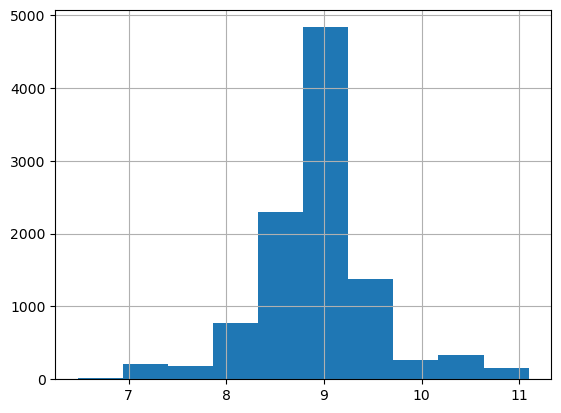

In [372]:
np.log1p(pre_h_df2['sqft_lot15']).hist()

In [374]:
pre_h_df2['sqft_lot15'] = np.log1p(pre_h_df2['sqft_lot15'])
pre_h_df2

,bedrooms,bathrooms,floors,sqft_living15,sqft_lot15,sqft,price
0,4,3.00,1.0,1360,8.517393,13.744087,13.311331
1,3,2.00,1.0,1800,8.923191,14.499825,13.142168
2,3,2.25,2.0,2238,8.827615,14.552713,12.458779
3,3,1.50,1.0,1650,9.181118,13.386189,12.583999
4,3,2.50,2.0,2390,8.932080,14.806146,12.685411
...,...,...,...,...,...,...,...
12796,4,2.50,2.0,2520,8.703507,15.603230,13.322338
12797,4,3.50,2.0,2050,8.732466,16.074313,13.822984
12798,3,2.50,2.0,1330,7.143618,13.689566,13.071072
12799,4,2.50,2.0,1830,8.881975,15.354023,12.899222


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'floors'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>,
        <Axes: title={'center': 'sqft'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

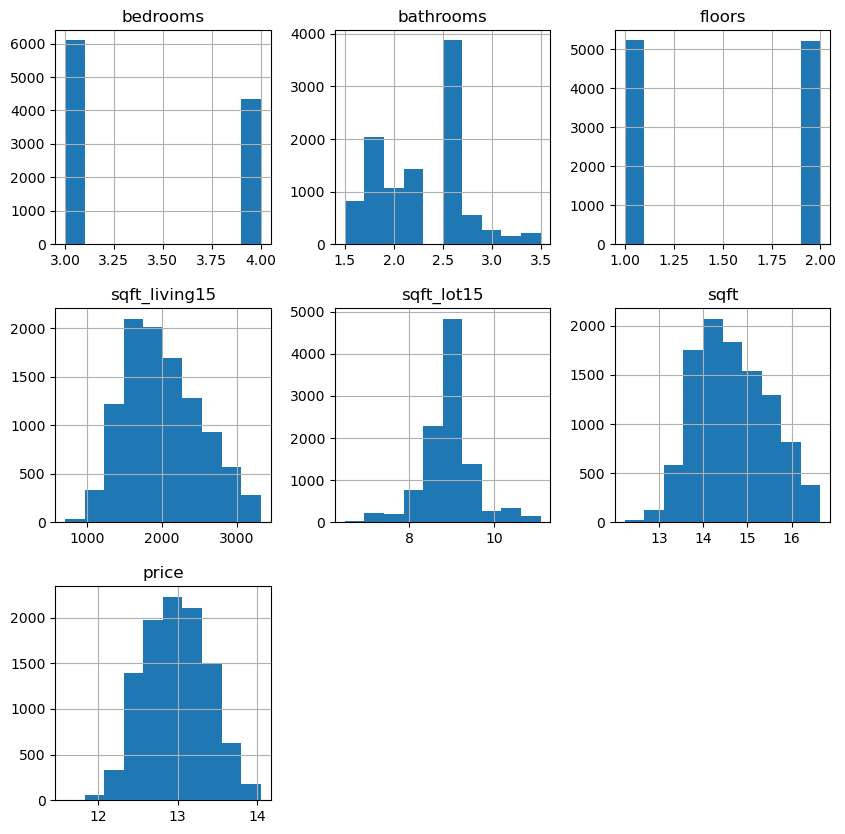

In [375]:
pre_h_df2.hist(figsize=(10, 10))

- bedrooms feature의 분포를 언더샘플링으로 맞춰줍니다.

In [381]:
pre_h_df2.bedrooms.value_counts()

bedrooms
3    6094
4    4335
Name: count, dtype: int64

In [383]:
three_rooms = pre_h_df2[pre_h_df2.bedrooms == 3].sample(4335, random_state=124)
four_rooms = pre_h_df2[pre_h_df2.bedrooms == 4]
pre_h_df2 = pd.concat([three_rooms, four_rooms], axis=0).reset_index(drop=True)
pre_h_df2

,bedrooms,bathrooms,floors,sqft_living15,sqft_lot15,sqft,price
0,3,2.25,2.0,2240,9.108640,15.341794,13.429850
1,3,1.75,1.0,1770,8.843759,13.842911,12.936036
2,3,3.25,2.0,2670,8.779711,15.773194,13.190024
3,3,1.75,1.0,2049,9.633252,14.648159,12.468441
4,3,1.75,1.0,2910,10.439718,14.555257,13.300511
...,...,...,...,...,...,...,...
8665,4,2.75,2.0,2530,8.697680,15.580087,12.765691
8666,4,2.50,2.0,2673,8.779711,16.248190,13.202654
8667,4,2.50,2.0,2520,8.703507,15.603230,13.322338
8668,4,3.50,2.0,2050,8.732466,16.074313,13.822984


<Axes: >

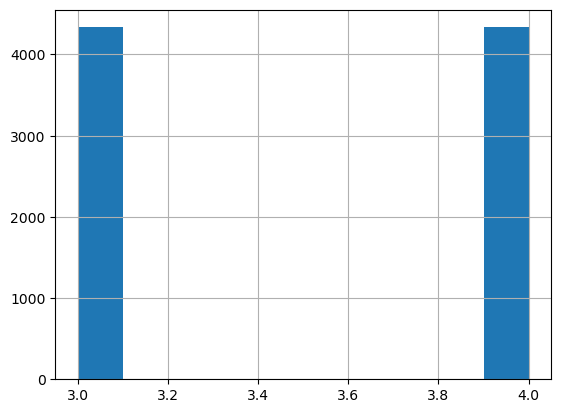

In [384]:
pre_h_df2.bedrooms.hist()

- 이제 다시 OLS 및 VIF 를 구해봅니다.

In [394]:
from statsmodels.api import OLS

features, targets = pre_h_df2.iloc[:, :-1], pre_h_df2.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          8.703e+05
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:38:10   Log-Likelihood:                         -6780.0
No. Observations:                8670   AIC:                                  1.357e+04
Df Residuals:                    8664   BIC:                                  1.361e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [395]:
get_vif(features)

,vif_score,feature
0,60.406284,bedrooms
1,46.328970,bathrooms
2,21.786210,floors
3,24.066045,sqft_living15
4,266.329021,sqft_lot15
5,506.435359,sqft


- coef값이 낮은 sqft_living15를 삭제하여 OLS와 VIF를 확인해봅니다.

In [396]:
features = features.drop(labels=['sqft_living15'], axis=1)
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          9.407e+05
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:38:22   Log-Likelihood:                         -7232.7
No. Observations:                8670   AIC:                                  1.448e+04
Df Residuals:                    8665   BIC:                                  1.451e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [397]:
get_vif(features)

,vif_score,feature
0,60.376501,bedrooms
1,45.900496,bathrooms
2,21.736708,floors
3,264.754492,sqft_lot15
4,481.246816,sqft


- VIF에 큰 변화가 없으므로, 반대로 sqft_lot15를 삭제해봅니다.

In [400]:
features, targets = pre_h_df2.iloc[:, :-1], pre_h_df2.iloc[:, -1]
features = features.drop(labels=['sqft_lot15'], axis=1)
model = OLS(targets, features)
print(model.fit().summary())
get_vif(features)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          9.783e+05
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:42:30   Log-Likelihood:                         -7063.2
No. Observations:                8670   AIC:                                  1.414e+04
Df Residuals:                    8665   BIC:                                  1.417e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

,vif_score,feature
0,60.405819,bedrooms
1,45.131520,bathrooms
2,15.814098,floors
3,23.923767,sqft_living15
4,103.186213,sqft


- vif의 수치들이 줄어들었음을 확인할 수 있습니다.
- 따라서 sqft_living15 또한 삭제합니다.

In [401]:
features = features.drop(labels=['sqft_living15'], axis=1)
model = OLS(targets, features)
print(model.fit().summary())
get_vif(features)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.095e+06
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:42:44   Log-Likelihood:                         -7541.3
No. Observations:                8670   AIC:                                  1.509e+04
Df Residuals:                    8666   BIC:                                  1.512e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,vif_score,feature
0,60.375280,bedrooms
1,44.582572,bathrooms
2,15.644675,floors
3,91.040177,sqft


- 이제 범주형 데이터에 가까운 bedrooms와 bathrooms, floors를 하나의 feature로 묶습니다.

In [411]:
category_df = pre_h_df2[['bedrooms', 'bathrooms', 'floors', 'price']]
category_df

,bedrooms,bathrooms,floors,price
0,3,2.25,2.0,13.429850
1,3,1.75,1.0,12.936036
2,3,3.25,2.0,13.190024
3,3,1.75,1.0,12.468441
4,3,1.75,1.0,13.300511
...,...,...,...,...
8665,4,2.75,2.0,12.765691
8666,4,2.50,2.0,13.202654
8667,4,2.50,2.0,13.322338
8668,4,3.50,2.0,13.822984


In [412]:
from statsmodels.api import OLS

features, targets = category_df.iloc[:, :-1], category_df.iloc[:, -1]

model = OLS(targets, features)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          1.911e+05
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:48:27   Log-Likelihood:                         -16301.
No. Observations:                8670   AIC:                                  3.261e+04
Df Residuals:                    8667   BIC:                                  3.263e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [413]:
columns = category_df.columns[:-1]
for column in columns:
    coef = result.params[column]
    if coef < 0:
        coef *= -1
    elif coef < 1:
        coef += 1
    category_df.loc[:, column] *= coef
pre_h_df2.loc[:, 'category_sum'] = category_df['bedrooms'] + category_df['bathrooms'] + category_df['floors']
pre_h_df2

,bedrooms,bathrooms,floors,sqft_living15,sqft_lot15,sqft,price,category_sum
0,3,2.25,2.0,2240,9.108640,15.341794,13.429850,13.535487
1,3,1.75,1.0,1770,8.843759,13.842911,12.936036,11.612224
2,3,3.25,2.0,2670,8.779711,15.773194,13.190024,15.325923
3,3,1.75,1.0,2049,9.633252,14.648159,12.468441,11.612224
4,3,1.75,1.0,2910,10.439718,14.555257,13.300511,11.612224
...,...,...,...,...,...,...,...,...
8665,4,2.75,2.0,2530,8.697680,15.580087,12.765691,16.914343
8666,4,2.50,2.0,2673,8.779711,16.248190,13.202654,16.466734
8667,4,2.50,2.0,2520,8.703507,15.603230,13.322338,16.466734
8668,4,3.50,2.0,2050,8.732466,16.074313,13.822984,18.257170


In [414]:
pre_h_df2 = pre_h_df2.drop(labels=['bedrooms', 'bathrooms', 'floors'], axis=1)
prices = pre_h_df2.price
pre_h_df2 = pre_h_df2.drop(labels=['price'], axis=1)
pre_h_df2['price'] = prices
pre_h_df2

,sqft_living15,sqft_lot15,sqft,category_sum,price
0,2240,9.108640,15.341794,13.535487,13.429850
1,1770,8.843759,13.842911,11.612224,12.936036
2,2670,8.779711,15.773194,15.325923,13.190024
3,2049,9.633252,14.648159,11.612224,12.468441
4,2910,10.439718,14.555257,11.612224,13.300511
...,...,...,...,...,...
8665,2530,8.697680,15.580087,16.914343,12.765691
8666,2673,8.779711,16.248190,16.466734,13.202654
8667,2520,8.703507,15.603230,16.466734,13.322338
8668,2050,8.732466,16.074313,18.257170,13.822984


array([[<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>],
       [<Axes: title={'center': 'sqft'}>,
        <Axes: title={'center': 'category_sum'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

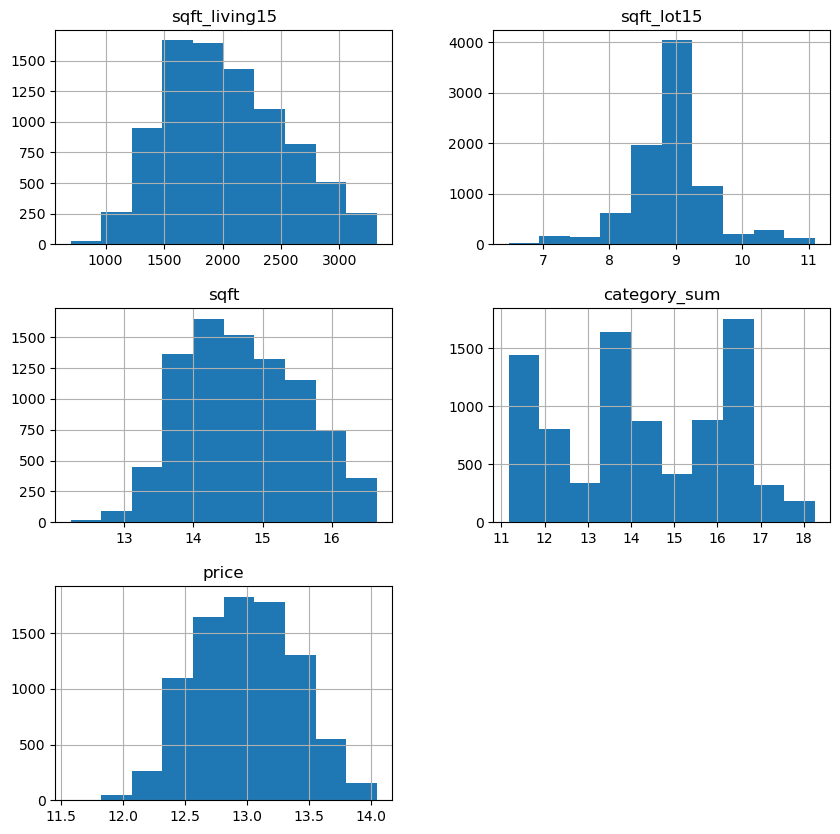

In [415]:
pre_h_df2.hist(figsize=(10, 10))

- 데이터끼리의 스케일을 맞춰주기 위해 sqft_living15 feature에 log1p 스케일을 적용합니다.

In [416]:
pre_h_df2['sqft_living15'] = np.log1p(pre_h_df2['sqft_living15'])
pre_h_df2

,sqft_living15,sqft_lot15,sqft,category_sum,price
0,7.714677,9.108640,15.341794,13.535487,13.429850
1,7.479300,8.843759,13.842911,11.612224,12.936036
2,7.890208,8.779711,15.773194,15.325923,13.190024
3,7.625595,9.633252,14.648159,11.612224,12.468441
4,7.976252,10.439718,14.555257,11.612224,13.300511
...,...,...,...,...,...
8665,7.836370,8.697680,15.580087,16.914343,12.765691
8666,7.891331,8.779711,16.248190,16.466734,13.202654
8667,7.832411,8.703507,15.603230,16.466734,13.322338
8668,7.626083,8.732466,16.074313,18.257170,13.822984


- OLS 및 VIF를 확인해봅니다.

In [423]:
from statsmodels.api import OLS

features, targets = pre_h_df2.iloc[:, :-1], pre_h_df2.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.998e+06
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:53:01   Log-Likelihood:                         -4939.0
No. Observations:                8670   AIC:                                      9886.
Df Residuals:                    8666   BIC:                                      9914.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [424]:
get_vif(features)

,vif_score,feature
0,857.789039,sqft_living15
1,249.155090,sqft_lot15
2,842.686112,sqft
3,102.397499,category_sum


In [425]:
features = features.drop(labels=['sqft_living15'], axis=1)
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.466e+06
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:53:03   Log-Likelihood:                         -7524.7
No. Observations:                8670   AIC:                                  1.506e+04
Df Residuals:                    8667   BIC:                                  1.508e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------